In [40]:
import numpy as np
import matplotlib.pyplot as plt


from skimage.transform import hough_circle, hough_circle_peaks
from skimage import feature, color, draw, transform 


In [44]:
def find_center_rings_hough(image, num_rings, rad_range, intensity_thresh, sigma, v_range = None):
    """
    Take angled cut or multiple incremented cuts of a image data.

    Parameters
    ----------
    image : ndarray
        Image data 
    num_rings : int
        Number of candidate circles to be searched for
    rad_range : array
        The min, max, and increment for range of candidate radii to be searched
    intensity_thresh : array
        Min and max of intensity to be used in canny filter
    sigma : float
        Standard deviation applied in canny filter
    v_range : array
        Min and max for matplotlib colormap

    Returns
    -------
    center_pt : array
        Average center of the candidate circles
    radii: array
        radii of the candidate circles
        
    """
    
    low_thresh = intensity_thresh[0]
    hi_thresh = intensity_thresh[1]
    sigma = sigma
    edges = feature.canny(image, sigma, low_threshold= low_thresh, high_threshold= hi_thresh)
    
    low = rad_range[0]
    hi = rad_range[1]
    step = rad_range[2]
    
    # Range of possible radii
    hough_radii = np.arange(low, hi, step)
    hough_res = transform.hough_circle(edges, hough_radii)

    # Selects the most prominent circles, up to num_rings
    accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=num_rings)

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    Z = color.gray2rgb(image)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = draw.circle_perimeter(center_y, center_x, radius,
                                        shape=Z.shape)
        ax.scatter(x = circx,y =circy, s = 1, c = 'red')
    center_pt = [np.average(cx), np.average(cy)]
    
    ax.scatter(center_pt[0], center_pt[1], s =20, c = 'red')
    if v_range != None:
        ax.imshow(image, cmap="viridis", vmin = v_range[0], vmax = v_range[1])
    else:
        ax.imshow(image, cmap="viridis")
    plt.show()
    
    return center_pt,radii

### Example:

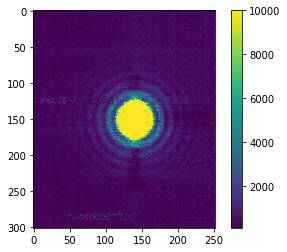

In [45]:
Z = np.load("rough_signal.npy")
fig, ax = plt.subplots()
im = plt.imshow(Z, vmin  = .01e4, vmax = 1e4)
cbar = fig.colorbar(im)

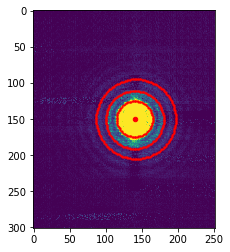

In [46]:
center, rad = find_center_rings_hough(Z, num_rings = 3, rad_range = [20, 100, 5], intensity_thresh = [30, 900], sigma = 3, v_range = [.01e4,1e4]) 